In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/faulty-steel-plates/faults.csv
/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
!pip install livelossplot

  Obtaining dependency information for livelossplot from https://files.pythonhosted.org/packages/e3/fd/07864f0fdb2d279d2b777fd6ac1ce6e31d19b23b7bc9807145b076d49f2b/livelossplot-0.5.5-py3-none-any.whl.metadata


In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
#original_data = pd.read_csv('/kaggle/input/faulty-steel-plates/faults.csv')

test_data=pd.read_csv("/kaggle/input/playground-series-s4e3/test.csv")


In [4]:
id_test=test_data["id"]
test_data=test_data.drop("id",axis=1)

In [5]:
#df = pd.concat([train_data, original_data],
#                axis=0, sort=False, ignore_index=True)
df=train_data.copy()

In [6]:
df.drop("id",axis=1,inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [9]:
label_cols = ['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']

In [10]:
X = df.drop(label_cols,axis=1)
y = df[label_cols]

In [11]:
X.shape

(19219, 27)

In [12]:
y.shape

(19219, 7)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19219 non-null  int64  
 1   X_Maximum              19219 non-null  int64  
 2   Y_Minimum              19219 non-null  int64  
 3   Y_Maximum              19219 non-null  int64  
 4   Pixels_Areas           19219 non-null  int64  
 5   X_Perimeter            19219 non-null  int64  
 6   Y_Perimeter            19219 non-null  int64  
 7   Sum_of_Luminosity      19219 non-null  int64  
 8   Minimum_of_Luminosity  19219 non-null  int64  
 9   Maximum_of_Luminosity  19219 non-null  int64  
 10  Length_of_Conveyer     19219 non-null  int64  
 11  TypeOfSteel_A300       19219 non-null  int64  
 12  TypeOfSteel_A400       19219 non-null  int64  
 13  Steel_Plate_Thickness  19219 non-null  int64  
 14  Edges_Index            19219 non-null  float64
 15  Em

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Select the columns to scale
columns_to_scale = X.columns.difference(['synthetic'])


#X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
#test_data[columns_to_scale] = scaler.transform(test_data[columns_to_scale])

X = scaler.fit_transform(X[columns_to_scale])
test_data = scaler.transform(test_data[columns_to_scale])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True)

In [16]:
print(X_train.shape , y_train.shape)

(15375, 27) (15375, 7)


In [17]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [18]:
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))

In [19]:
X_train.shape, X_test.shape

((15375, 27, 1), (3844, 27, 1))

In [20]:
input_shape = X_train.shape[1:]
input_shape

(27, 1)

In [21]:
y_train.shape

(15375, 7)

In [22]:
#y_train=y_train.to_numpy()

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool1D, GlobalAveragePooling1D, MaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate, GRU, Reshape
import tensorflow.keras.backend as K



In [24]:
#import tensorflow as tf
#import numpy as np

# Set random seeds for reproducibility
RANDOM_SEED = 42
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [25]:
def bn_rl_conv(x,filters,kernel=1,strides=1):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(filters, kernel, strides=strides,padding = 'same')(x)
    return x

In [26]:
def dense_block(x, repetition, filters):        
    for _ in range(repetition):
        y = bn_rl_conv(x, 4*filters)
        y = bn_rl_conv(y, filters, 3)
        x = concatenate([y,x])
    return x

In [27]:
def transition_layer(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
    x = AvgPool1D(2, strides = 2, padding = 'same')(x)
    return x

In [28]:
def build_densenet(input_shape, filters=32):
    input_data = Input(input_shape)
    x = Conv1D(64, 7, strides=2, padding='same')(input_data)
    x = MaxPool1D(3, strides=2, padding='same')(x)

    for repetition in [6, 12, 24, 16]:
        d = dense_block(x, repetition, filters)
        x = transition_layer(d)

    x = GlobalAveragePooling1D()(d)
    output = Dense(7, activation='sigmoid')(x)  # Use 'sigmoid' for multilabel prediction
    model = Model(input_data, output)

    return model

#input_shape = (27, 1)  # Adjust the shape according to your data
#model = build_densenet(input_shape)

In [29]:
from tensorflow.keras.metrics import Recall, Precision ,AUC
import tensorflow.keras as keras



input_shape = (27, 1)
filters = 32
clf = build_densenet(input_shape, filters = 16)
clf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[AUC(),'accuracy'])   

#clf.summary()

In [30]:
from tensorflow.keras.utils import plot_model

#plot_model(clf, to_file="model_fig.jpg", show_shapes=True)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import roc_auc_score
from livelossplot import PlotLossesKeras


# Define a custom callback to calculate AUC score
class AUCCallback(keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(AUCCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        y_true = self.validation_data[1]
        y_pred = self.model.predict(self.validation_data[0])
        auc = roc_auc_score(y_true, y_pred)
        print(f'\nValidation AUC: {auc:.4f}\n')

# file path for saving model weights
model_weights_file_path = "simple_model_weights.h5"

# Callbacks
checkpoint = ModelCheckpoint(filepath=model_weights_file_path, 
                             monitor="val_auc",  # Monitor AUC score
                             verbose=1, 
                             save_best_only=True, 
                             mode="max", 
                             save_weights_only=True)

early_stopping = EarlyStopping(monitor="val_auc",
                               mode="max", 
                               verbose=1, 
                               patience=20)

lr_reduce = ReduceLROnPlateau(monitor='val_auc', 
                               factor=0.5, 
                               patience=5, 
                               verbose=1, 
                               mode='max', 
                               min_delta=0.0001, 
                               cooldown=0, 
                               min_lr=0)

auc_callback = AUCCallback(validation_data=(X_test, y_test))

call_backs = [checkpoint, early_stopping, lr_reduce, auc_callback,PlotLossesKeras()]


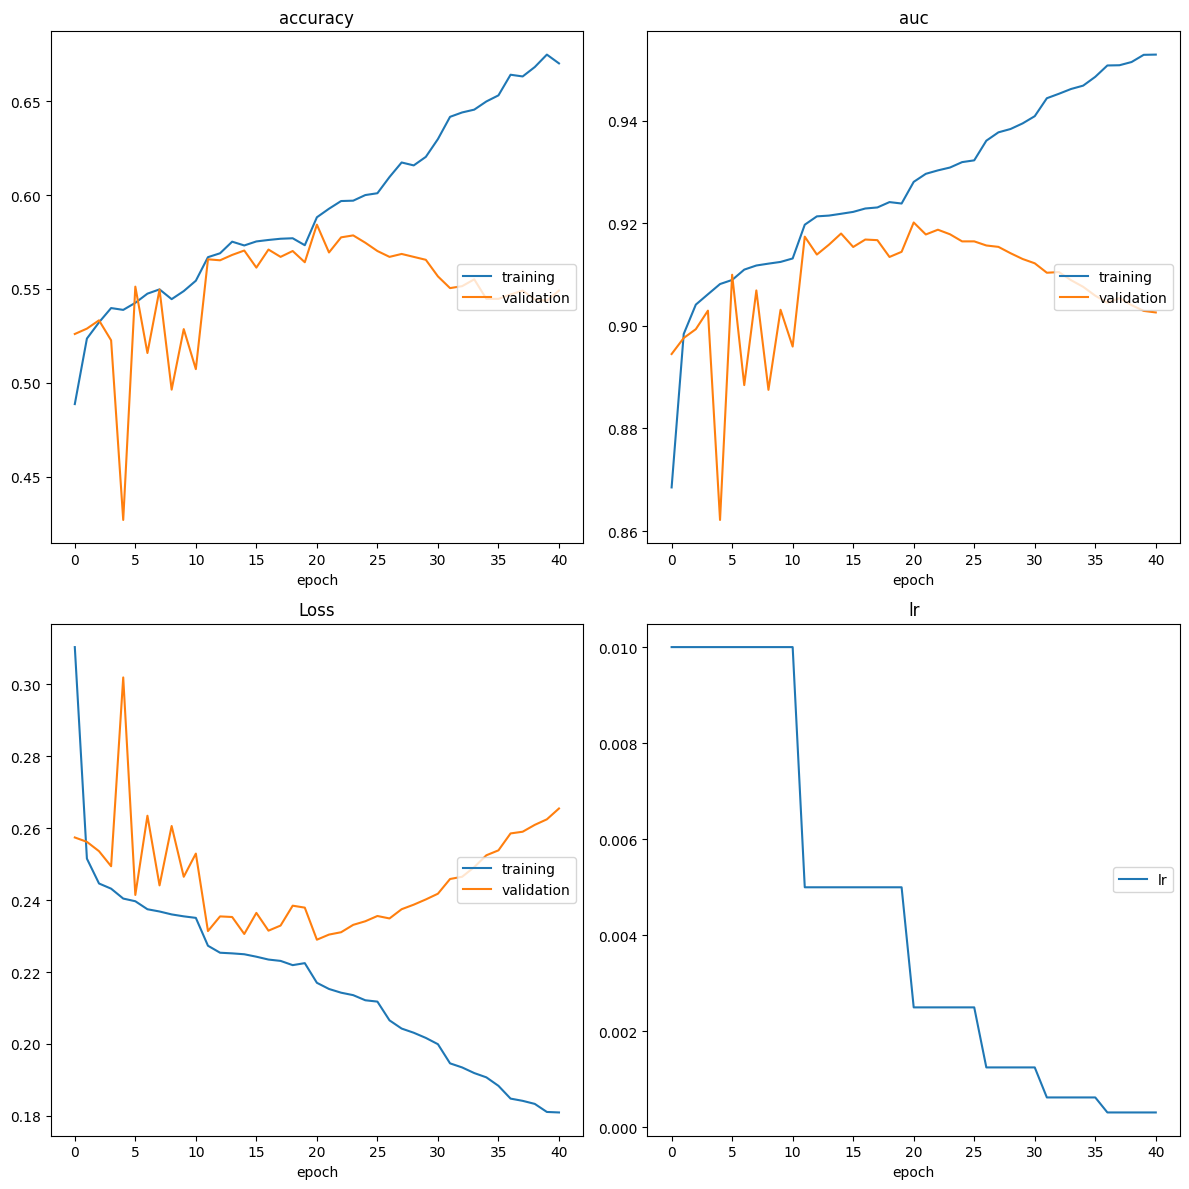

accuracy
	training         	 (min:    0.489, max:    0.675, cur:    0.670)
	validation       	 (min:    0.427, max:    0.584, cur:    0.549)
auc
	training         	 (min:    0.869, max:    0.953, cur:    0.953)
	validation       	 (min:    0.862, max:    0.920, cur:    0.903)
Loss
	training         	 (min:    0.181, max:    0.310, cur:    0.181)
	validation       	 (min:    0.229, max:    0.302, cur:    0.265)
lr
	lr               	 (min:    0.000, max:    0.010, cur:    0.000)
481/481 [==============================] - 70s 146ms/step - loss: 0.1810 - auc: 0.9529 - accuracy: 0.6702 - val_loss: 0.2654 - val_auc: 0.9026 - val_accuracy: 0.5492 - lr: 3.1250e-04
Epoch 41: early stopping


In [32]:
EPOCHS = 60
BATCH_SIZE = 32

history = clf.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    #validation_split=0.1,
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    callbacks=call_backs,
                    verbose=1)


In [33]:
#clf.save('dsnet121_model_weights.h5')

In [34]:
#from tensorflow.keras.models import load_model

#clf = load_model('dsnet121_model_weights.h5', custom_objects={"f1_score":f1_score})

In [35]:
clf.load_weights('/kaggle/working/simple_model_weights.h5')


In [36]:
y_hat = clf.predict(test_data)

401/401 [==============================] - 8s 20ms/step


In [37]:
y_hat

array([[5.6920230e-01, 9.3406986e-04, 5.9956564e-03, ..., 1.6867088e-02,
        1.2609650e-01, 2.8370199e-01],
       [2.4801159e-01, 1.7910013e-02, 4.1814212e-02, ..., 3.0813578e-01,
        7.1131080e-02, 3.2960856e-01],
       [7.7718595e-04, 1.1915203e-01, 4.6054740e-02, ..., 6.5572099e-03,
        2.8353241e-01, 5.6818438e-01],
       ...,
       [5.7818653e-04, 2.3064062e-05, 9.6633440e-01, ..., 4.3144578e-06,
        3.5476615e-04, 6.6621535e-02],
       [4.2454717e-01, 2.9526029e-03, 4.3399934e-02, ..., 1.3726717e-01,
        7.5492114e-02, 3.3312848e-01],
       [2.2911119e-04, 2.7015727e-04, 9.7287041e-01, ..., 2.5611064e-06,
        5.2717584e-04, 4.1815232e-02]], dtype=float32)

In [38]:
sub=pd.DataFrame()
sub['id']=id_test
sub[label_cols]=y_hat

In [39]:
sub.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.569202,0.000934,0.005996,0.000010,0.016867,0.126097,0.283702
1,19220,0.248012,0.017910,0.041814,0.000205,0.308136,0.071131,0.329609
2,19221,0.000777,0.119152,0.046055,0.006612,0.006557,0.283532,0.568184
3,19222,0.240578,0.000155,0.000321,0.000038,0.014299,0.298135,0.441508
4,19223,0.004264,0.000848,0.001636,0.001138,0.024236,0.529204,0.394479


In [40]:
sub.to_csv("submission.csv", index=False)